In [11]:
#!pip install fastai

In [12]:
!python --version



Python 3.10.16


Total images found: 636
Example image path: C:\Users\PNW_checkout\Desktop\Desktop\Dataset\thermal images UL\Blast\Thermalimage10a.jpg


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.729475,1.878453,0.354331,0.645669,01:38


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.773862,1.580388,0.472441,0.527559,02:02
1,1.495220,1.390657,0.637795,0.362205,02:00
2,1.219534,1.130217,0.700787,0.299213,02:00
3,1.024588,0.806194,0.795276,0.204724,01:59
4,0.873996,0.724993,0.811024,0.188976,02:00


              precision    recall  f1-score   support

         BLB       0.93      0.74      0.82        53
       Blast       1.00      0.83      0.91        18
     healthy       0.56      0.56      0.56         9
       hispa       0.93      0.96      0.94        26
 leaf folder       0.64      1.00      0.78         9
   leaf spot       0.50      0.83      0.62        12

    accuracy                           0.81       127
   macro avg       0.76      0.82      0.77       127
weighted avg       0.85      0.81      0.82       127



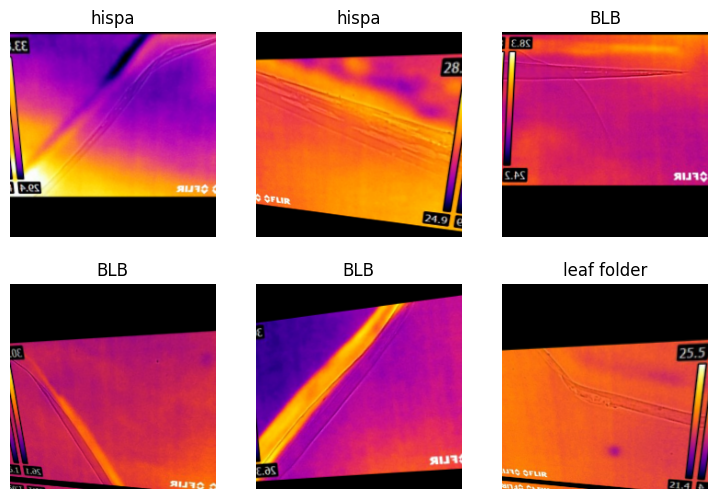

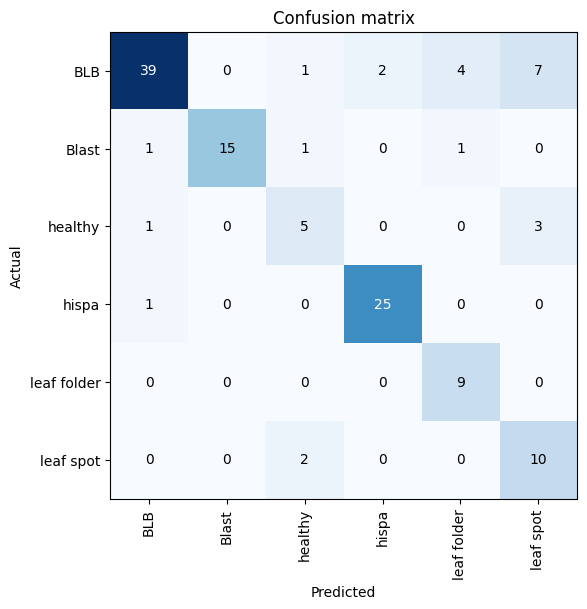

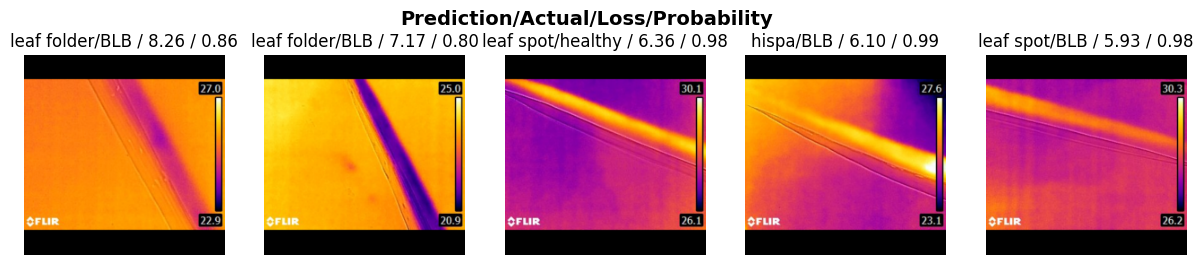

In [ ]:
################################################
## Image Classification using FastAI
################################################

# Required Libraries
from fastai.vision.all import *
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Step 1: Set Path to Dataset
# Make sure your folder structure is: root/class_name/image.jpg
path = Path(r'C:\Users\PNW_checkout\Desktop\Desktop\Dataset')  # Update as needed

# Step 2: Load Files to Confirm Path
fns = get_image_files(path)
print(f"Total images found: {len(fns)}")
print(f"Example image path: {fns[0]}")

# Step 3: DataBlock Definition
fruits = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224, ResizeMethod.Pad, pad_mode='zeros'),  # Pad instead of crop
    batch_tfms=aug_transforms()  # Add basic data augmentation
)

# Step 4: Create DataLoaders
dls = fruits.dataloaders(path, bs=32)  # Adjust batch size if needed

# Step 5: Visualize a Few Samples
dls.show_batch(max_n=6, nrows=2)

# Step 6: Define and Train the Model
learn = cnn_learner(dls, resnet34, metrics=[accuracy, error_rate])
learn.fine_tune(5)

# Step 7: Evaluate the Model
interp = ClassificationInterpretation.from_learner(learn)

# Plot Confusion Matrix
interp.plot_confusion_matrix(figsize=(6,6))

# Plot Top Losses
interp.plot_top_losses(5, nrows=1)

# Step 8: Detailed Classification Report
preds, targs = learn.get_preds()
print(classification_report(targs, preds.argmax(dim=1), target_names=dls.vocab))

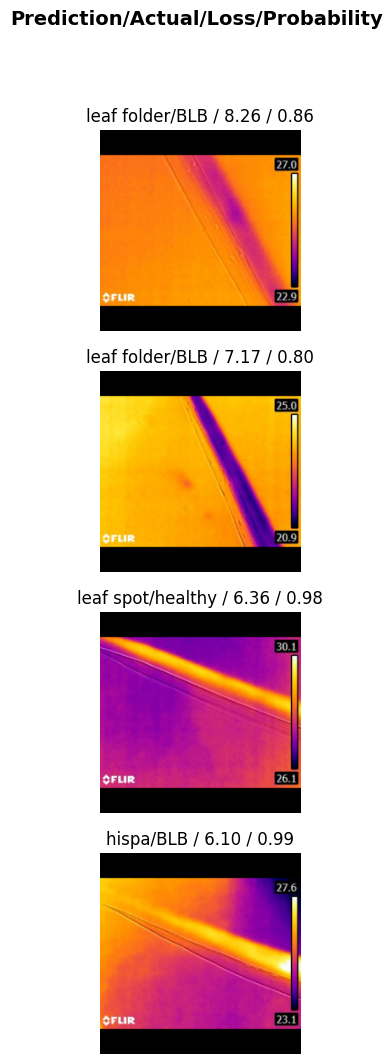

In [28]:
## plot_top_losses shows us the images with the highest loss in our dataset


interp.plot_top_losses(4, nrows=4)

In [23]:
learn.export("PaddyThermal.pkl")

In [24]:

learn_inf = load_learner('PaddyThermal.pkl')

C:\Users\PNW_checkout\anaconda3\envs\py310_agentsAI\lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [25]:
learn_inf.dls.vocab

['BLB', 'Blast', 'healthy', 'hispa', 'leaf folder', 'leaf spot']